In [36]:
import pandas as pd
import re
import seaborn as sns

In [37]:
df = pd.read_excel('real_estate_sofia_357_pages.xlsx')
df.head()

,Real Estate Name,Location,Price (EUR),Size (m2)
0,"Едностаен апартамент,32 м2","София, Драгалевци",60 800 EUR,32.0
1,"Двустаен апартамент,59 м2","София, Дружба 1",149 000 EUR,59.0
2,"Едностаен апартамент,45 м2","София, Манастирски Ливади",143 000 EUR,45.0
3,"Двустаен апартамент,60 м2","София, Център",300 000 EUR,60.0
4,"Едностаен апартамент,50 м2","София, Младост 4",130 000 EUR,50.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Real Estate Name  1239 non-null   object 
 1   Location          1239 non-null   object 
 2   Price (EUR)       1239 non-null   object 
 3   Size (m2)         1237 non-null   float64
dtypes: float64(1), object(3)
memory usage: 38.8+ KB


In order to perform some analysis we need to convert the price and the size to numeric attributes.
We can also remove the square meter size from the real estate name. Some posts have missing data in them so we can drop those

Some real estates do not have a speicific price (only when you ask)(призапитване)

In [39]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1237 entries, 0 to 1238
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Real Estate Name  1237 non-null   object 
 1   Location          1237 non-null   object 
 2   Price (EUR)       1237 non-null   object 
 3   Size (m2)         1237 non-null   float64
dtypes: float64(1), object(3)
memory usage: 48.3+ KB


In [40]:
# remove values which do not have a specific price
df = df[df['Price (EUR)'] != 'при запитване']

# replace the EUR part from the price values with an empty space
df['Price (EUR)'] = df['Price (EUR)'].str.replace('EUR', '')

# remove the empty space and convert to integer
df['Price (EUR)'] = df['Price (EUR)'].str.replace(' ', '').astype(int)

# remove the size and sq m2 from the RE name
df['Real Estate Name'] = df['Real Estate Name'].str.replace(r',\d+\s*м2', '', regex=True)

# create a price p/sq meter column
df['Price p/m2'] = (df['Price (EUR)']/df['Size (m2)']).round(0).astype(int)

df.head()

,Real Estate Name,Location,Price (EUR),Size (m2),Price p/m2
0,Едностаен апартамент,"София, Драгалевци",60800,32.0,1900
1,Двустаен апартамент,"София, Дружба 1",149000,59.0,2525
2,Едностаен апартамент,"София, Манастирски Ливади",143000,45.0,3178
3,Двустаен апартамент,"София, Център",300000,60.0,5000
4,Едностаен апартамент,"София, Младост 4",130000,50.0,2600


Let's see what type of real estate for living purposes do we have in the dataset.

In [41]:
df['Real Estate Name'].unique().tolist()

['Едностаен апартамент',
 'Двустаен апартамент',
 'Тристаен апартамент',
 'Многостаен апартамент',
 'Къща',
 'Четиристаен апартамент',
 'Мезонет',
 'Ателие,Таван, Студио']

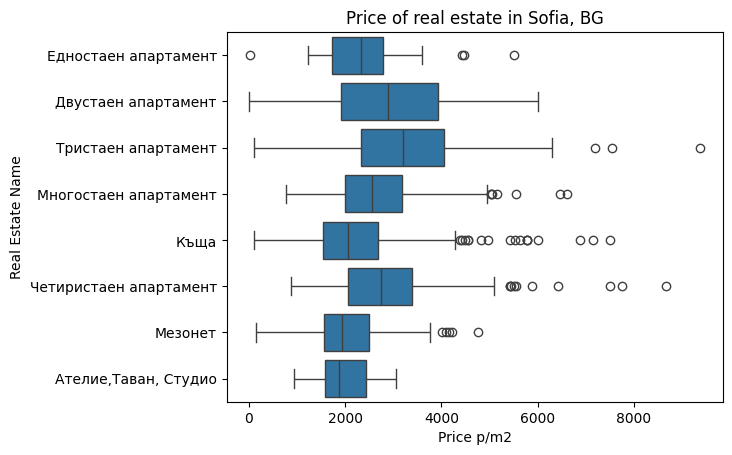

In [42]:
sns.boxplot(df, x = 'Price p/m2', y = 'Real Estate Name').set_title('Price of real estate in Sofia, BG');

Text(0.5, 1.0, 'Price of living RE in Sofia (EUR p/m2)')

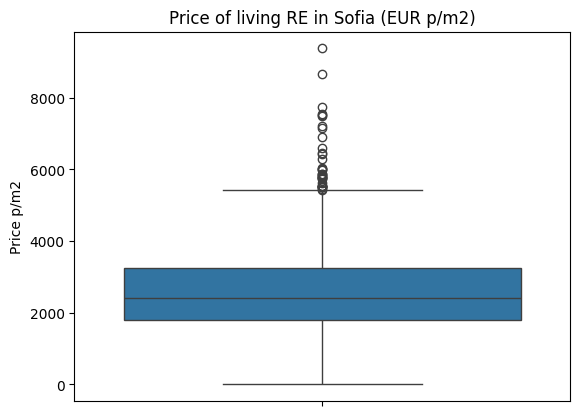

In [43]:
sns.boxplot(df, y = 'Price p/m2').set_title('Price of living RE in Sofia (EUR p/m2)')

Let's see the most expensive neighbourhoods in Sofia

In [44]:
# remove Sofia from the Location column
df['Location'] = df['Location'].str.replace('София,', '')
df.head()

,Real Estate Name,Location,Price (EUR),Size (m2),Price p/m2
0,Едностаен апартамент,Драгалевци,60800,32.0,1900
1,Двустаен апартамент,Дружба 1,149000,59.0,2525
2,Едностаен апартамент,Манастирски Ливади,143000,45.0,3178
3,Двустаен апартамент,Център,300000,60.0,5000
4,Едностаен апартамент,Младост 4,130000,50.0,2600


In [75]:
# Group by neighbourhood to see min, max and avg price for each neighbourhood
df_neighburhood_price_grouped = df.groupby('Location')['Price p/m2'].agg(['min', 'max', 'mean']).reset_index()

# rename the column names 
df_neighburhood_price_grouped.rename(columns={'min': 'min price', 'max': 'max price', 'mean': 'avg price'}, inplace=True)

df_neighburhood_price_grouped.sort_values(by='avg price', ascending=False, inplace=True)

df_neighburhood_price_grouped.reset_index(drop=True)

,Location,min price,max price,avg price
0,"Център, ул. Княз Борис І",5417,5417,5417.0
1,"Център, Докторски паметник",5224,5224,5224.0
2,"Център, ул. Стефан Караджа",5072,5072,5072.0
3,"Център, бул. Витоша",4615,4615,4615.0
4,Бенковски,4390,4390,4390.0
...,...,...,...,...
104,Казичене (с.),1004,1004,1004.0
105,Мало Бучино,635,1081,858.0
106,Ботунец,789,789,789.0
107,Филиповци,735,735,735.0


The most expensive neighbourhoods to live in Sofia (based on price p/m2) are in the City Centre (prices are > 4500 eur p/m2). Whereas the cheapest ones where the suare meter is < 1000 EUR are Kazichene, Malo Buchino, Botunec, etc.

Let's see which type of accomodation is the most expensive one (1/2/3 or 4 bedroom appartment)

In [46]:
df_appartment_type_grouped = df.groupby('Real Estate Name')['Price p/m2'].mean()
df_appartment_type_grouped.sort_values()

Real Estate Name
Ателие,Таван, Студио      1958.916667
Мезонет                   2057.365385
Къща                      2287.113712
Едностаен апартамент      2398.326087
Многостаен апартамент     2669.895238
Четиристаен апартамент    2900.963731
Двустаен апартамент       2901.605263
Тристаен апартамент       3235.762431
Name: Price p/m2, dtype: float64

The highest price is for 3 bedroom appartments (3235 eur p/m2)

Maybe we want to buy a home which has more space, e.g.more than 100m2. Let us see which neigbourhood has the most offers of spacious appartments.

In [91]:
# filter appartments > 100 m2
df_large_re = df[df['Size (m2)'] >= 100]

# group by neighbourhood
df_large_re_per_neighbourhood = df_large_re.groupby('Location')['Price p/m2'].count().reset_index()

# rename the column for easier understanding
df_large_re_per_neighbourhood.rename(columns={'Price p/m2': 'RE > 100m2 in region'}, inplace=True)

# sort the values by the number of real estate > 100 in th neighbourhood
df_large_re_per_neighbourhood = df_large_re_per_neighbourhood.sort_values(by = 'RE > 100m2 in region', ascending=False)

df_large_re_per_neighbourhood.reset_index(drop=True)

# keep only the ones which have at least 20 large apaprtments
df_large_re_per_neighbourhood = df_large_re_per_neighbourhood[df_large_re_per_neighbourhood['RE > 100m2 in region'] >= 20]
df_large_re_per_neighbourhood

,Location,RE > 100m2 in region
83,Център,83
42,Лозенец,76
7,Бояна,68
64,Оборище,61
39,Кръстова Вада,57
11,Витоша,49
21,Драгалевци,49
2,Банкя (гр.),32
46,Малинова Долина,28
49,Манастирски Ливади,24


In [92]:
# group to see have the price information and the number of large appartments for each location

df_merged_neighbourhood = pd.merge(df_neighburhood_price_grouped, df_large_re_per_neighbourhood, how='right', on='Location')
df_merged_neighbourhood

,Location,min price,max price,avg price,RE > 100m2 in region
0,Център,191,9375,3862.167832,83
1,Лозенец,1542,7508,3362.545455,76
2,Бояна,2,5529,2611.742857,68
3,Оборище,1500,5991,3439.121622,61
4,Кръстова Вада,1065,5517,2679.918033,57
5,Витоша,1085,3386,2010.629630,49
6,Драгалевци,1019,6889,2514.888889,49
7,Банкя (гр.),616,2920,1672.545455,32
8,Малинова Долина,708,4095,2095.625000,28
9,Манастирски Ливади,1250,4929,2644.405405,24


We managed to narrow down the search for a real estate to 10 neighbourhoods.

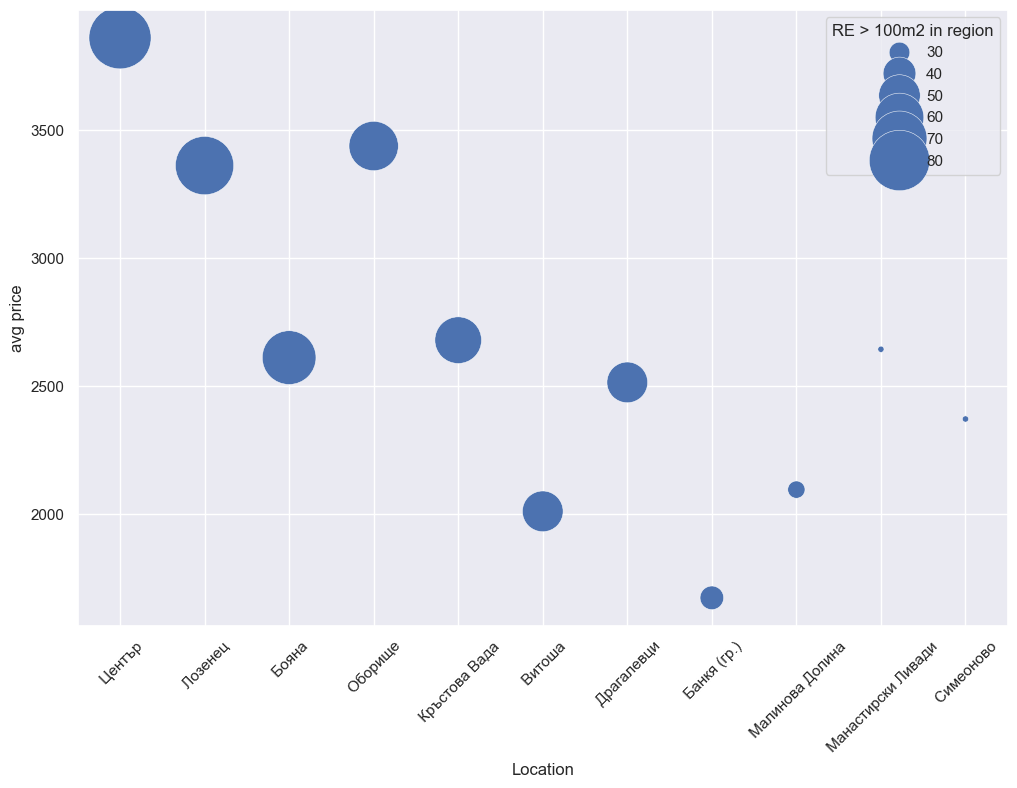

In [100]:
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

# Set the figure size
plt.figure(figsize=(12, 8))

# use the scatterplot function to build the bubble map
ax = sns.scatterplot(
    data=df_merged_neighbourhood,
    x="Location",
    y="avg price",
    size="RE > 100m2 in region",
    legend=True,
    sizes=(20, 2000),
    )

plt.xticks(rotation=45)
plt.show;